In [ ]:
import torch
import torchvision
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import time
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
torch.cuda.is_available()

True

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
train_data = datasets.FashionMNIST(root='data', train=True, download=True, transform=transform)

In [4]:
test_data = datasets.FashionMNIST(root='data', train=False, download=True, transform=transform)
b_size = 128
train_loader = torch.utils.data.DataLoader(train_data, batch_size=b_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=b_size, shuffle=True)

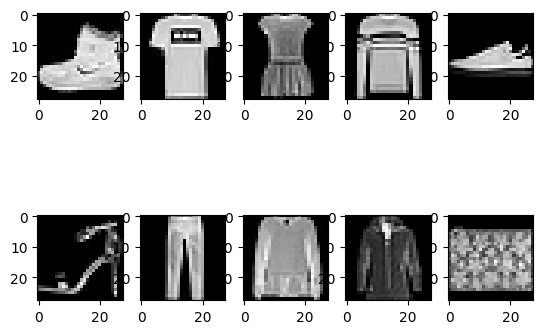

In [5]:
images = []
labels = []
for i in range(100):
    image, label = train_data[i]
    if label not in labels:
        labels.append(label)
        images.append(image)
        
fig, axes = plt.subplots(nrows=2, ncols=5)
for i, img in enumerate(images):
    row = i // 5
    col = i % 5
    axes[row][col].imshow(img.numpy().reshape(28, 28), cmap='gray')
plt.show()

In [6]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = 2, padding = 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
            nn.Dropout2d(0.1))
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2),
            nn.Dropout2d(0.2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = 5, padding = 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2,padding=1),
            nn.Dropout2d(0.3)) 
        
        self.fc1 = nn.Linear(in_features = 128*3*3, out_features = 512)
        self.fc2 = nn.Linear(512, 10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc1(out)
        out = self.fc2(out)
        
        return out

In [7]:
model = CNN()
print(model)

CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout2d(p=0.1, inplace=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout2d(p=0.2, inplace=False)
  )
  (layer3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Dropout2d(p=0.3, inplace=False)
  )
  (fc1): Li

In [8]:
from torchsummary import summary

summary(model)

Layer (type:depth-idx)                   Param #
├─Sequential: 1-1                        --
|    └─Conv2d: 2-1                       160
|    └─BatchNorm2d: 2-2                  64
|    └─ReLU: 2-3                         --
|    └─MaxPool2d: 2-4                    --
|    └─Dropout2d: 2-5                    --
├─Sequential: 1-2                        --
|    └─Conv2d: 2-6                       8,256
|    └─BatchNorm2d: 2-7                  128
|    └─ReLU: 2-8                         --
|    └─MaxPool2d: 2-9                    --
|    └─Dropout2d: 2-10                   --
├─Sequential: 1-3                        --
|    └─Conv2d: 2-11                      204,928
|    └─BatchNorm2d: 2-12                 256
|    └─ReLU: 2-13                        --
|    └─MaxPool2d: 2-14                   --
|    └─Dropout2d: 2-15                   --
├─Linear: 1-4                            590,336
├─Linear: 1-5                            5,130
Total params: 809,258
Trainable params: 809,258
Non-

Layer (type:depth-idx)                   Param #
├─Sequential: 1-1                        --
|    └─Conv2d: 2-1                       160
|    └─BatchNorm2d: 2-2                  64
|    └─ReLU: 2-3                         --
|    └─MaxPool2d: 2-4                    --
|    └─Dropout2d: 2-5                    --
├─Sequential: 1-2                        --
|    └─Conv2d: 2-6                       8,256
|    └─BatchNorm2d: 2-7                  128
|    └─ReLU: 2-8                         --
|    └─MaxPool2d: 2-9                    --
|    └─Dropout2d: 2-10                   --
├─Sequential: 1-3                        --
|    └─Conv2d: 2-11                      204,928
|    └─BatchNorm2d: 2-12                 256
|    └─ReLU: 2-13                        --
|    └─MaxPool2d: 2-14                   --
|    └─Dropout2d: 2-15                   --
├─Linear: 1-4                            590,336
├─Linear: 1-5                            5,130
Total params: 809,258
Trainable params: 809,258
Non-

In [9]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

loss = torch.nn.CrossEntropyLoss()
training = optim.Adam(model.parameters(), lr = .001)
num_epochs = 10

In [10]:
def trainer(model, loss, training, num_epochs):
    train_losses = []
    test_losses = []
    train_accs = []
    test_accs = []
    for epoch in range(num_epochs):
        train_iters, train_passed  = 0, 0
        train_loss, train_acc = 0., 0.
        start=time.time()
        
        model.train()
        for X, y in train_loader:
            X, y = X.to(device), y.to(device)
            training.zero_grad()
            y_pred = model(X)
            l = loss(y_pred, y)
            l.backward()
            training.step()
            train_loss += l.item()
            train_acc += (y_pred.argmax(dim=1) == y).sum().item()
            train_iters += 1
            train_passed += len(X)
        
        test_iters, test_passed  = 0, 0
        test_loss, test_acc = 0., 0.
        model.eval()
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            l = loss(y_pred, y)
            test_loss += l.item()
            test_acc += (y_pred.argmax(dim=1) == y).sum().item()
            test_iters += 1
            test_passed += len(X)
            
        train_losses.append(train_loss / train_iters) 
        test_losses.append(test_loss / test_iters)
        train_accs.append(train_acc / train_passed)
        test_accs.append(test_acc / test_passed)
            
        print("Epoch: {}\n Time taken: {:.2f}\n train_loss: {}, train_acc: {} \n test_loss: {}, test_acc: {}\n".format(
            epoch+1, time.time() - start, train_loss / train_iters, train_acc / train_passed,
            test_loss / test_iters, test_acc / test_passed)
        )
        
    eps = range(1, num_epochs+1)
    plt.plot(eps, train_losses, label='Train Loss')
    plt.plot(eps, test_losses, label='Test Loss')
    plt.plot(eps, train_accs, label='Train acc')
    plt.plot(eps, test_accs, label='Test acc')
    plt.xlabel('Epochs')
    plt.ylabel('Loss/Accuracy')
    plt.legend()
    plt.show()

Epoch: 1
 Time taken: 25.72
 train_loss: 0.4951424955495639, train_acc: 0.8184166666666667 
 test_loss: 0.3991728040236461, test_acc: 0.8526

Epoch: 2
 Time taken: 20.51
 train_loss: 0.3514733855276982, train_acc: 0.8716166666666667 
 test_loss: 0.3132096495054945, test_acc: 0.888

Epoch: 3
 Time taken: 20.01
 train_loss: 0.31853481262985833, train_acc: 0.8831833333333333 
 test_loss: 0.29149145208582095, test_acc: 0.8934

Epoch: 4
 Time taken: 20.06
 train_loss: 0.28816720568485604, train_acc: 0.8952166666666667 
 test_loss: 0.28282828393239007, test_acc: 0.8974

Epoch: 5
 Time taken: 20.37
 train_loss: 0.27232453376372484, train_acc: 0.90005 
 test_loss: 0.26004775264595126, test_acc: 0.9057

Epoch: 6
 Time taken: 20.20
 train_loss: 0.25640283393135455, train_acc: 0.90585 
 test_loss: 0.26436430706253533, test_acc: 0.9034

Epoch: 7
 Time taken: 19.93
 train_loss: 0.24527892004897092, train_acc: 0.9110833333333334 
 test_loss: 0.2632587804824491, test_acc: 0.909

Epoch: 8
 Time taken:

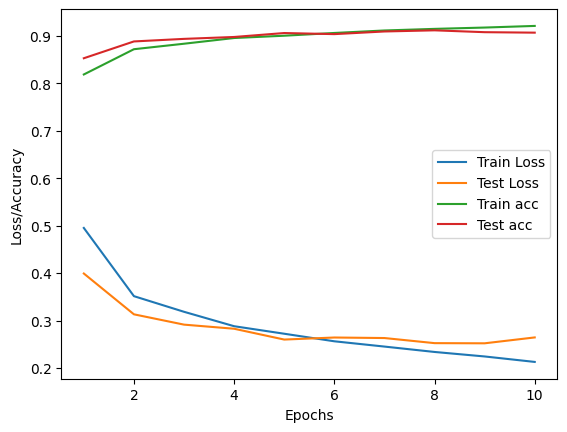

In [12]:
trainer(model, loss, training, num_epochs)